# Neural Networks for Musical Instrument Classification

In this project, we will attempt a musical instrument classification problem.  Given a sample of music, we want to determine which instrument (e.g. trumpet, violin, piano) is playing.  

*This assignment is closely based on one by Sundeep Rangan, from his [IntroML GitHub repo](https://github.com/sdrangan/introml/).*


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Audio Feature Extraction with Librosa

The key to audio classification is to extract useful features. The `librosa` package in Python has a rich set of methods for extracting the features of audio samples commonly used in machine learning tasks, such as speech recognition and sound classification. 


In [2]:
#import sys
#!{sys.executable} -m pip install "librosa"
import librosa
import librosa.display
import librosa.feature

In this lab, we will use a set of music samples from the website:

http://theremin.music.uiowa.edu

We will use the `wget` command to retrieve one file to our Google Colab storage area. (We can run `wget` and many other basic Linux commands in Colab by prefixing them with a `!` or `%`.)

In [3]:
!wget "http://theremin.music.uiowa.edu/sound files/MIS/Woodwinds/sopranosaxophone/SopSax.Vib.pp.C6Eb6.aiff"

--2020-11-06 23:25:18--  http://theremin.music.uiowa.edu/sound%20files/MIS/Woodwinds/sopranosaxophone/SopSax.Vib.pp.C6Eb6.aiff
Resolving theremin.music.uiowa.edu (theremin.music.uiowa.edu)... 128.255.102.154, 2620:0:e50:680c::73
Connecting to theremin.music.uiowa.edu (theremin.music.uiowa.edu)|128.255.102.154|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1418242 (1.4M) [audio/aiff]
Saving to: ‘SopSax.Vib.pp.C6Eb6.aiff.1’

SopSax.Vib.pp.C6Eb6 100%[===================>]   1.35M  2.80MB/s    in 0.5s    

2020-11-06 23:25:18 (2.80 MB/s) - ‘SopSax.Vib.pp.C6Eb6.aiff.1’ saved [1418242/1418242]



Now, if you click on the small folder icon on the far left of the Colab interface, you can see the files in your Colab storage. You should see the "SopSax.Vib.pp.C6Eb6.aiff" file appear there.

In order to listen to this file, we'll first convert it into the `wav` format. Again, we'll use the `!` to run a basic command-line utility: `ffmpeg`, a powerful tool for working with audio and video files.

In [4]:
aiff_file = 'SopSax.Vib.pp.C6Eb6.aiff'
wav_file = 'SopSax.Vib.pp.C6Eb6.wav'

!ffmpeg -y -i $aiff_file $wav_file

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

Now, we can play the file directly from Colab. If you listen to it you will hear a soprano saxaphone (with vibrato) playing four notes (C, C#, D, Eb).

In [5]:
import IPython.display as ipd
ipd.Audio(wav_file) 

Next, use `librosa` command `librosa.load` to read the audio file with filename `audio_file` and get the samples `y` and sample rate `sr`.

In [6]:
y, sr = librosa.load(aiff_file)

Feature engineering from audio files is an entire course on its own right.  A commonly used set of features are called the Mel Frequency Cepstral Coefficients (MFCCs).  These are derived from the so-called mel spectrogram, which extracts features that correlate with human audio perception.  

You can run the code below to display the mel spectrogram from the audio sample.

You can easily see the four notes played in the audio track.  You also see the 'harmonics' of each notes, which are other tones at integer multiples of the fundamental frequency of each note.

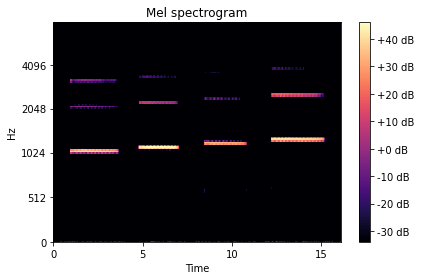

In [7]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
librosa.display.specshow(librosa.amplitude_to_db(S),
                         y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

## Downloading the Data


Using the MFCC features described above, [Prof. Juan Bello](http://steinhardt.nyu.edu/faculty/Juan_Pablo_Bello) and his former PhD student Eric Humphrey have created a complete data set that can used for instrument classification.  Essentially, they collected a number of data files from the website above.  For each audio file, the segmented the track into notes and then extracted 120 MFCCs for each note.  The goal is to recognize the instrument from the 120 MFCCs.  The process of feature extraction is quite involved.  So, we will just use their processed data.

To retrieve their data, visit

https://github.com/marl/dl4mir-tutorial/blob/master/README.md

and note the password listed on that page. Click on the link for "Instrument Dataset", enter the password, click on `instrument_dataset` to open the folder, and download the four files there. and note the password listed on that page. Click on the link for "Instrument Dataset", enter the password, click on `instrument_dataset` to open the folder, and download the four files there. (You can "direct download" straight from this site, you don't need a Dropbox account.)


Then, upload the files to your Google Colab storage: click on the folder icon on the left to see your storage, if it isn't already open, and then click on "Upload". Wait until _all_ uploads have completed.

Then, load the files with:

In [8]:
#from google.colab import drive
#drive.mount('/content/drive')

In [9]:
Xtr = np.load('uiowa_train_data.npy')
ytr = np.load('uiowa_train_labels.npy')
Xts = np.load('uiowa_test_data.npy')
yts = np.load('uiowa_test_labels.npy')

Examine the data you have just loaded in:


In [10]:
# number of training samples
print("number of training samples:         ", len(ytr));
# number of test samples
print("number of test samples:             ", len(yts));
# number of features for each sample
print("number of features for each sample: ", len(Xts[1]));
# how many classes (instruments) are there
classes = np.unique(yts)
print("number of instruments:              ", len(classes));

number of training samples:          66247
number of test samples:              14904
number of features for each sample:  120
number of instruments:               10


Then, standardize the training and test data, `Xtr` and `Xts`, by removing the mean of each feature and scaling to unit variance. 


You can do this manually, or using `sklearn`'s [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). 

Make sure you standardize both the training and test data using the mean and variance of the *training data only*.  (If using a `StandardScaler`: create a single `StandardScaler`, call `fit` with the training data, then call `tranform` with the training data, and finally call `transform` with the test data.)

<small>Standardizing input data can make the gradient descent easier; see [this video](https://www.youtube.com/watch?reload=9&v=UIp2CMI0748) for further explanation.</small>

In [11]:
from sklearn.preprocessing import StandardScaler;

# Scale the training and test matrices
scaler = StandardScaler();
scaler.fit(Xtr);
Xtr_scale = scaler.transform(Xtr);
Xts_scale = scaler.transform(Xts);

from tensorflow.keras.utils import to_categorical;
ytr = to_categorical(ytr, 10);
yts = to_categorical(yts, 10);

print(ytr.shape);

(66247, 10)


## Building a Neural Network Classifier

Following this [example](https://colab.research.google.com/drive/1t2OeBGcfB5HSDFl6FPQFaQKbmeEAPPgG?usp=sharing), prepare and create a neural network with :

* 256 hidden units in a single dense hidden layer
* sigmoid activation at hidden units
* `softmax` activation at the output (since this is a multi-class classification problem)
* Cross-entropy loss
* Adam optimizer with a learning rate of 0.001
* print the model summary


In [12]:
# construct the model, print model summary, and compile the model
import tensorflow as tf;
from tensorflow.keras.models import Model, Sequential;
from tensorflow.keras.layers import Dense, Activation;

import tensorflow.keras.backend as K
K.clear_session();

def createModel():
  model = Sequential();

  model.add(Dense(units = 256,
                  input_shape = (120,),
                  activation = 'sigmoid',
                  name = 'hidden'));

  model.add(Dense(units = 10,
                  activation = 'softmax',
                  name = 'output'));
  return model;

model = createModel();

from tensorflow.keras import optimizers;
opt = optimizers.Adam(lr = 0.001);

print(model.summary());

model.compile(optimizer = opt,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']);

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 256)               30976     
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 33,546
Trainable params: 33,546
Non-trainable params: 0
_________________________________________________________________
None


Fit the model for 10 epochs (passes through the entire data). Use the scaled training data to fit the model, and also pass the test data as "validation data" so that the loss and accuracy will be computed on the test data as well.

Use a batch size of 128.  The final accuracy was >99%.

In [13]:
# fit the model
hist = model.fit(x = Xtr_scale,
                 y = ytr,
                 epochs = 10,
                 batch_size = 128,
                 validation_data = (Xts_scale, yts))

Epoch 1/10
518/518 [==============================] - 1s 3ms/step - loss: 0.4126 - accuracy: 0.8868 - val_loss: 0.2270 - val_accuracy: 0.9398
Epoch 2/10
518/518 [==============================] - 1s 2ms/step - loss: 0.1251 - accuracy: 0.9698 - val_loss: 0.1173 - val_accuracy: 0.9693
Epoch 3/10
518/518 [==============================] - 1s 2ms/step - loss: 0.0741 - accuracy: 0.9826 - val_loss: 0.0767 - val_accuracy: 0.9833
Epoch 4/10
518/518 [==============================] - 1s 2ms/step - loss: 0.0519 - accuracy: 0.9877 - val_loss: 0.0617 - val_accuracy: 0.9858
Epoch 5/10
518/518 [==============================] - 1s 2ms/step - loss: 0.0395 - accuracy: 0.9904 - val_loss: 0.0468 - val_accuracy: 0.9877
Epoch 6/10
518/518 [==============================] - 1s 2ms/step - loss: 0.0315 - accuracy: 0.9920 - val_loss: 0.0379 - val_accuracy: 0.9903
Epoch 7/10
518/518 [==============================] - 1s 2ms/step - loss: 0.0258 - accuracy: 0.9932 - val_loss: 0.0375 - val_accuracy: 0.9892
Epoch 

Plot the training and test accuracy vs. epochs on one subplot, and the training and test loss vs. epoch on another subplot.  Use a log scale for the vertical axis on the loss plot.

The test accuracy saturates at a little higher than 99%.  After that it may "bounce around" due to the noise in the stochastic mini-batch gradient descent.

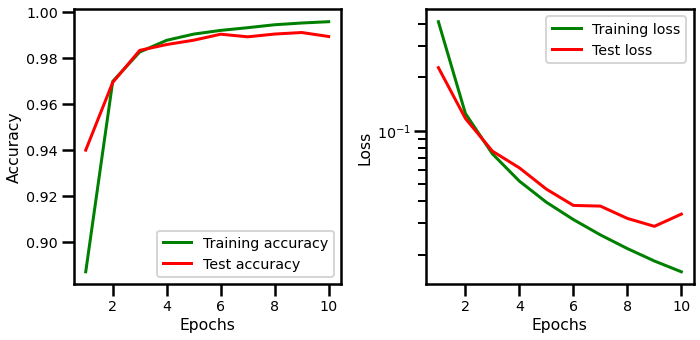

In [14]:
# two subplots: one of accuracy vs. epochs, one of loss vs. epochs
# in each subplot, show training in one color and test in another color

trainAcc  = hist.history['accuracy'];
testAcc   = hist.history['val_accuracy'];
trainLoss = hist.history['loss'];
testLoss  = hist.history['val_loss'];
nEpochs   = len(trainAcc);

plt.figure(figsize = (10,5));
sns.set_context("poster", font_scale = .65, rc={"grid.linewidth": 0.6})

# Accuracy Plot
plt.subplot(1,2,1);

sns.lineplot(x     = np.arange(1,nEpochs+1),
             y     = trainAcc,
             label = 'Training accuracy',
             color = 'green');

sns.lineplot(x     = np.arange(1,nEpochs+1),
             y     = testAcc,
             label = 'Test accuracy',
             color = 'red');

plt.xlabel('Epochs');
plt.ylabel('Accuracy');

# Loss Plot
plt.subplot(1,2,2)

sns.lineplot(x     = np.arange(1,nEpochs+1),
             y     = trainLoss,
             label = 'Training loss',
             color = 'green');

sns.lineplot(x     = np.arange(1,nEpochs+1),
             y     = testLoss,
             label = 'Test loss',
             color = 'red');

plt.yscale('log');
plt.xlabel('Epochs');
plt.ylabel('Loss');
plt.tight_layout();


## Varying the Learning Rate

One challenge in training neural networks is the selection of the learning rate.  Rerun the above code, trying four learning rates as shown in the vector `rates`.  For each learning rate, 

* clear the session
* prepare a neural network model as described above, with the appropriate learning rate
* train the model for 20 epochs
* save the accuracy and losses

In [15]:
rates = [0.1, 0.01, 0.001, 0.0001];

lrTrainAccDict  = {};
lrTestAccDict   = {};
lrTrainLossDict = {};
lrTestLossDict  = {};

for lRate in rates:
        
        K.clear_session();
        
        model = createModel();
        
        opt = optimizers.Adam(lr = lRate);
        
        model.compile(optimizer = opt,
                      loss = 'categorical_crossentropy',
                      metrics = ['accuracy']);
        
        hist = model.fit(x = Xtr_scale,
                         y = ytr,
                         epochs = 20,
                         batch_size = 128,
                         validation_data = (Xts_scale, yts));

        trainAcc  = hist.history['accuracy'];
        testAcc   = hist.history['val_accuracy'];
        trainLoss = hist.history['loss'];
        testLoss  = hist.history['val_loss'];

        lrTrainAccDict[lRate]  = trainAcc;
        lrTestAccDict[lRate]   = testAcc;
        lrTrainLossDict[lRate] = trainLoss;
        lrTestLossDict[lRate]  = testLoss;
  


Epoch 1/20
518/518 [==============================] - 1s 3ms/step - loss: 0.2870 - accuracy: 0.9417 - val_loss: 0.1791 - val_accuracy: 0.9540
Epoch 2/20
518/518 [==============================] - 1s 2ms/step - loss: 0.1722 - accuracy: 0.9589 - val_loss: 0.3845 - val_accuracy: 0.9429
Epoch 3/20
518/518 [==============================] - 1s 2ms/step - loss: 0.1945 - accuracy: 0.9636 - val_loss: 0.3632 - val_accuracy: 0.9342
Epoch 4/20
518/518 [==============================] - 1s 2ms/step - loss: 0.1866 - accuracy: 0.9683 - val_loss: 0.7006 - val_accuracy: 0.9379
Epoch 5/20
518/518 [==============================] - 1s 2ms/step - loss: 0.2046 - accuracy: 0.9707 - val_loss: 0.4646 - val_accuracy: 0.9414
Epoch 6/20
518/518 [==============================] - 1s 2ms/step - loss: 0.2136 - accuracy: 0.9713 - val_loss: 0.4895 - val_accuracy: 0.9446
Epoch 7/20
518/518 [==============================] - 1s 2ms/step - loss: 0.2029 - accuracy: 0.9738 - val_loss: 0.3321 - val_accuracy: 0.9538
Epoch 

Plot the training loss vs. the epoch for all of the learning rates on one plot.  You should see that the lower learning rates are more stable, but converge slower, while with a learning rate that is too high, the gradient descent may fail to move towards weights that decrease the loss function.

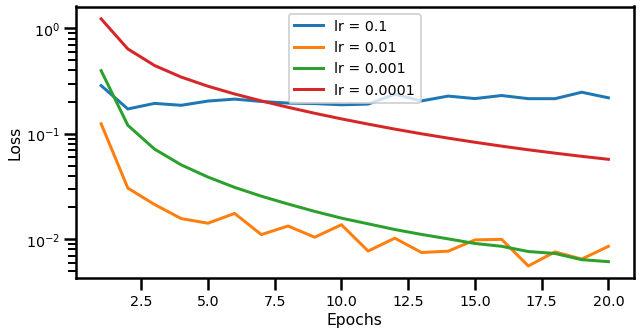

In [16]:
# training loss vs. epoch
plt.figure(figsize = (10,5));
sns.set_context("poster", font_scale = .65, rc={"grid.linewidth": 0.6})

nEpochs = 20;

sns.lineplot(x     = np.arange(1,nEpochs+1),
             y     = lrTrainLossDict[rates[0]],
             label = 'lr = ' + str(rates[0]));

sns.lineplot(x     = np.arange(1,nEpochs+1),
             y     = lrTrainLossDict[rates[1]],
             label = 'lr = ' + str(rates[1]));

sns.lineplot(x     = np.arange(1,nEpochs+1),
             y     = lrTrainLossDict[rates[2]],
             label = 'lr = ' + str(rates[2]));

sns.lineplot(x     = np.arange(1,nEpochs+1),
             y     = lrTrainLossDict[rates[3]],
             label = 'lr = ' + str(rates[3]));

plt.yscale('log');
plt.xlabel('Epochs');
plt.ylabel('Loss');
#plt.tight_layout();
